## Multinomial Choice Models and the Indepdence of Irrelevant Alternatives

In [17]:
import pandas as pd
import pymc as pm
import patsy
import numpy as np
import pytensor.tensor as pt
import arviz as az
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../..')

%reload_ext autoreload
from pymc_marketing.customer_choice.mnl_logit import MNLogit


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
utility_formulas = ['gc ~ ic_gc + oc_gc | income + rooms + agehed', 
                    'gr ~ ic_gr + oc_gr | income + rooms + agehed', 
                    'ec ~ ic_ec + oc_ec | income + rooms + agehed', 
                    'er ~ ic_er + oc_er | income + rooms + agehed', 
                    'hp ~ ic_hp + oc_hp | income + rooms + agehed']


df = pd.read_csv('../../../../data/choice_wide_heating.csv')
df

,idcase,depvar,ic_gc,ic_gr,ic_ec,ic_er,ic_hp,oc_gc,oc_gr,oc_ec,oc_er,oc_hp,income,agehed,rooms,region
0,1,gc,866.00,962.64,859.90,995.76,1135.50,199.69,151.72,553.34,505.60,237.88,7,25,6,ncostl
1,2,gc,727.93,758.89,796.82,894.69,968.90,168.66,168.66,520.24,486.49,199.19,5,60,5,scostl
2,3,gc,599.48,783.05,719.86,900.11,1048.30,165.58,137.80,439.06,404.74,171.47,4,65,2,ncostl
3,4,er,835.17,793.06,761.25,831.04,1048.70,180.88,147.14,483.00,425.22,222.95,2,50,4,scostl
4,5,er,755.59,846.29,858.86,985.64,883.05,174.91,138.90,404.41,389.52,178.49,2,25,6,valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,gc,766.39,877.71,751.59,869.78,942.70,142.61,136.21,474.48,420.65,203.00,6,20,4,mountn
896,897,gc,1128.50,1167.80,1047.60,1292.60,1297.10,207.40,213.77,705.36,551.61,243.76,7,45,7,scostl
897,898,gc,787.10,1055.20,842.79,1041.30,1064.80,175.05,141.63,478.86,448.61,254.51,5,60,7,scostl
898,899,gc,860.56,1081.30,799.76,1123.20,1218.20,211.04,151.31,495.20,401.56,246.48,5,50,6,scostl


In [3]:
mnl = MNLogit(df, utility_formulas, 'depvar', covariates=['ic', 'oc'])
mnl

In [4]:
mnl.sample()

Sampling: [alphas_, betas, betas_fixed_, likelihood]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alphas_, betas, betas_fixed_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Sampling: [likelihood]


Output()

In [5]:
az.summary(mnl.idata, var_names=['alphas', 'betas', 'betas_fixed'])

/Users/nathanielforde/mambaforge/envs/pymc-marketing-dev/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/nathanielforde/mambaforge/envs/pymc-marketing-dev/lib/python3.10/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/nathanielforde/mambaforge/envs/pymc-marketing-dev/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/nathanielforde/mambaforge/envs/pymc-marketing-dev/lib/python3.10/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alphas[gc],1.415,0.729,0.097,2.846,0.021,0.012,1221.0,1756.0,1.0
alphas[gr],0.397,0.817,-1.080,1.928,0.023,0.013,1290.0,2295.0,1.0
alphas[ec],0.820,1.003,-0.992,2.797,0.025,0.016,1661.0,2449.0,1.0
alphas[er],2.383,0.890,0.678,4.001,0.023,0.013,1550.0,2505.0,1.0
alphas[hp],0.000,0.000,0.000,0.000,0.000,NaN,4000.0,4000.0,NaN
betas[ic],-0.002,0.001,-0.003,-0.000,0.000,0.000,4081.0,2949.0,1.0
betas[oc],-0.007,0.002,-0.010,-0.004,0.000,0.000,3895.0,2946.0,1.0
"betas_fixed[gc, income]",-0.063,0.086,-0.232,0.091,0.002,0.001,1622.0,2014.0,1.0
"betas_fixed[gc, rooms]",-0.005,0.083,-0.156,0.160,0.002,0.001,1924.0,2378.0,1.0
"betas_fixed[gc, agehed]",0.016,0.011,-0.004,0.036,0.000,0.000,1718.0,2173.0,1.0


In [6]:
new_policy_df = df.copy()
new_policy_df[['ic_ec', 'ic_er']] = new_policy_df[['ic_ec', 'ic_er']]*1.5
new_policy_df = new_policy_df[new_policy_df['depvar'] != 'hp']

new_utility_formulas = ['gc ~ ic_gc + oc_gc | income + rooms + agehed', 
                    'gr ~ ic_gr + oc_gr | income + rooms + agehed', 
                    'ec ~ ic_ec + oc_ec | income + rooms + agehed', 
                    'er ~ ic_er + oc_er | income + rooms + agehed', 
                    #'hp ~ ic_hp + oc_hp | income + rooms + agehed'
                    ]


idata_new_policy = mnl.apply_intervention(new_choice_df=new_policy_df, new_utility_equations=new_utility_formulas)


Sampling: [alphas_, betas, betas_fixed_, likelihood]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alphas_, betas, betas_fixed_]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 107 seconds.
Sampling: [likelihood]


Output()

In [7]:
change_df = mnl.calculate_share_change(mnl.idata, mnl.intervention_idata)
change_df

,policy_share,new_policy_share,relative_change
product,,,
gc,0.636438,0.673741,0.058612
gr,0.143141,0.151948,0.061525
ec,0.071076,0.075501,0.062250
er,0.093420,0.098811,0.057704
hp,0.055925,0.000000,-1.000000


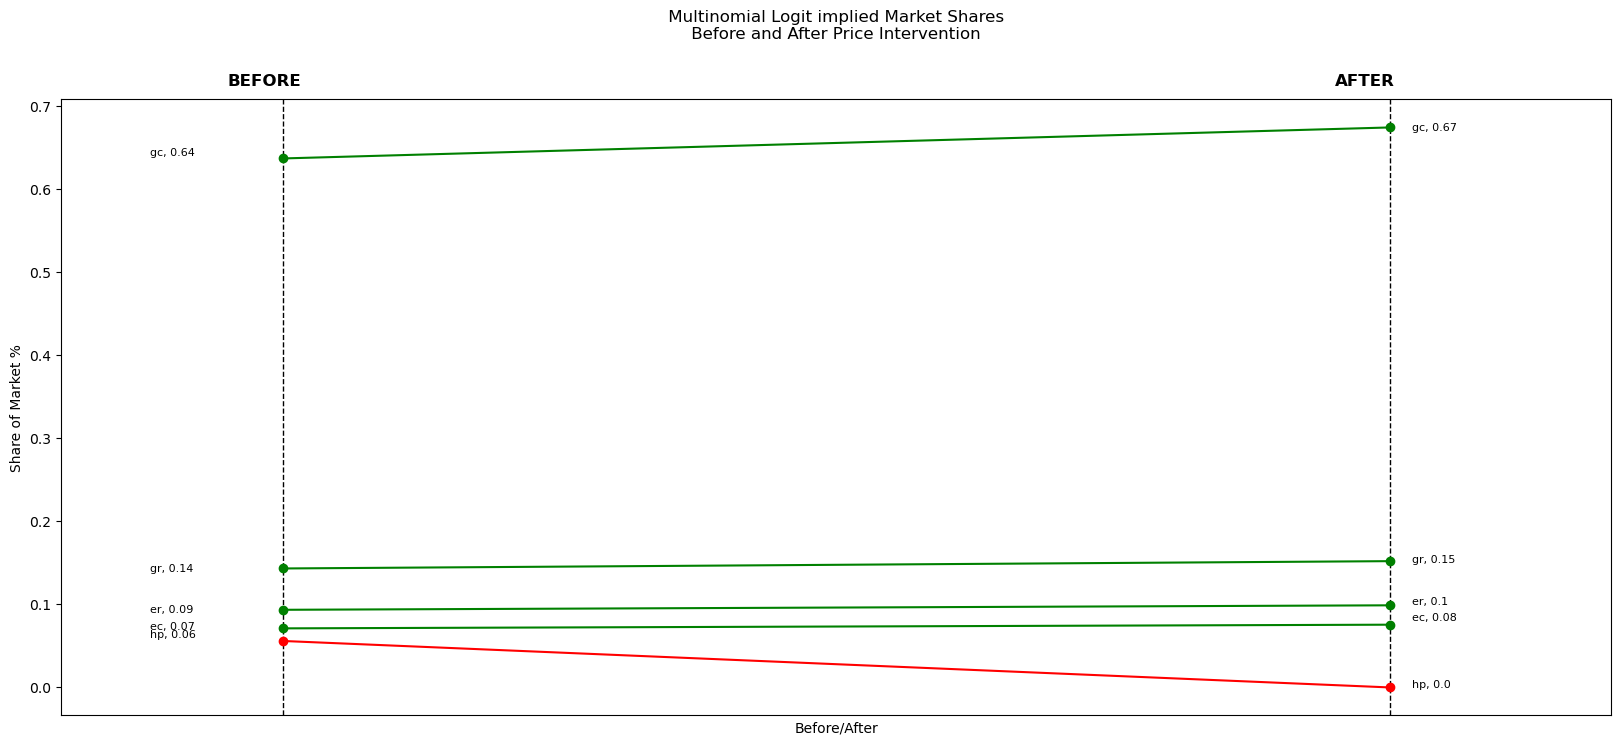

In [18]:
fig = mnl.make_change_plot(change_df, figsize=(20, 8))